In [1]:
import os
import matplotlib.pyplot as plt
folder_path = r"C:\Users\ambat\Downloads\DATASET-20251203T133241Z-1-001\DATASET"
print(os.listdir(folder_path))


['clear skin', 'dark spots', 'puffy eyes', 'wrinkles']


clear skin: 300 images
Dark spots: 303 images
puffy eyes: 300 images
wrinkles: 300 images


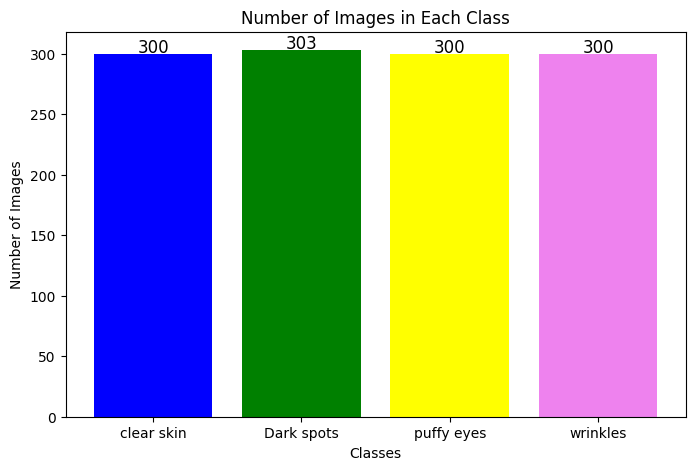

In [2]:

image_exts = (".jpg", ".jpeg", ".png", ".bmp", ".gif")
classes = ["clear skin","Dark spots","puffy eyes","wrinkles"]
counts = []

#image count
for c in classes:
    folder = os.path.join(folder_path, c)

    count = sum(
        1 for f in os.listdir(folder)
        if os.path.isfile(os.path.join(folder, f))
        and f.lower().endswith(image_exts)
    )

    counts.append(count)
    print(f"{c}: {count} images")
   

plt.figure(figsize=(8,5))

colors = ['blue', 'green', 'yellow', 'violet']

# bar chart
plt.bar(classes, counts, color=colors)

plt.title("Number of Images in Each Class")
plt.xlabel("Classes")
plt.ylabel("Number of Images")


for i, count in enumerate(counts):
    plt.text(i, count + 1, str(count), ha='center', fontsize=12)

plt.show()

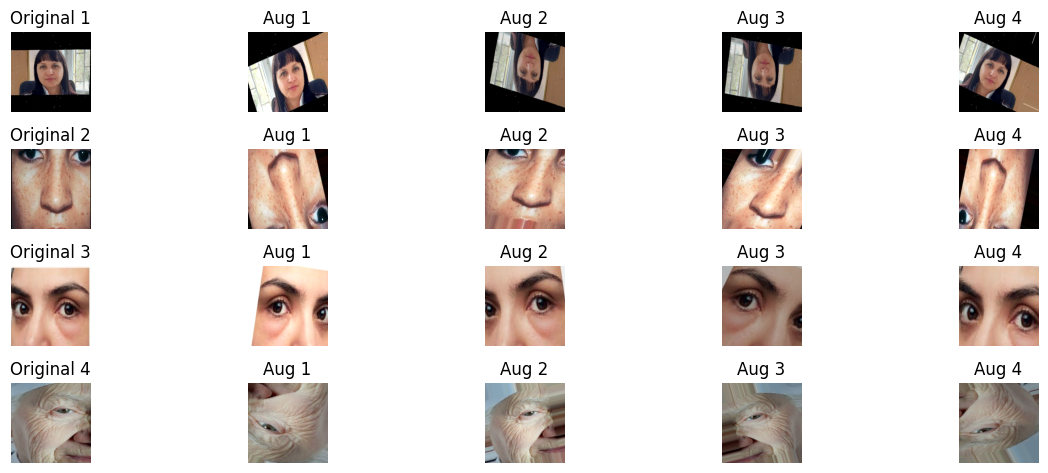

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import numpy as np
image_list = [
   r"C:\Users\ambat\Downloads\DATASET-20251203T133241Z-1-001\DATASET\clear skin\clear_skin_061.jpg",
   r"C:\Users\ambat\Downloads\DATASET-20251203T133241Z-1-001\DATASET\dark spots\2de295c0-801d-429e-8f74-fce181cc87cc.jpg", 
   r"C:\Users\ambat\Downloads\DATASET-20251203T133241Z-1-001\DATASET\puffy eyes\14.jpg", 
   r"C:\Users\ambat\Downloads\DATASET-20251203T133241Z-1-001\DATASET\wrinkles\36.jpg"
]

# Augmentation Configuration 
aug = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.7, 1.3],
    horizontal_flip=True,
    vertical_flip=True
)

#  Displaying  
rows = 5        
cols = 5                         

plt.figure(figsize=(12, 6))

for row, img_list in enumerate(image_list):

    # Load image
    original = load_img(img_list, target_size=(224, 224))
    arr = img_to_array(original)
    arr = np.expand_dims(arr, axis=0)

    # Show Original Image 
    plt.subplot(rows, cols, row * cols + 1)
    plt.imshow(original)
    plt.title(f"Original {row+1}")
    plt.axis("off")

    # Show Augmented images
    for j in range(4):
        augmented = next(aug.flow(arr, batch_size=1))[0].astype("uint8")
        plt.subplot(rows, cols, row * cols + (j + 2))
        plt.imshow(augmented)
        plt.title(f"Aug {j+1}")
        plt.axis("off")

plt.tight_layout()
plt.show()

Found 1202 files belonging to 4 classes.
Using 962 files for training.
Found 1202 files belonging to 4 classes.
Using 240 files for validation.
Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.3119 - loss: 1.3934 - val_accuracy: 0.4042 - val_loss: 1.2986
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.3950 - loss: 1.2973 - val_accuracy: 0.4500 - val_loss: 1.2338
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.4761 - loss: 1.2223 - val_accuracy: 0.5208 - val_loss: 1.1689
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.5416 - loss: 1.1526 - val_accuracy: 0.5708 - val_loss: 1.1072
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.5936 - loss: 1.0874 - val_accuracy: 0.6250 - val_loss: 1.0500
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.6299 - loss: 1.0363 - val_accuracy: 0.6542 - val_loss: 1.0011
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 29s 937ms/step - accuracy: 0.6445 - loss: 1.0045 - val_accurac

Model saved successfully as dermalscan_model.h5

Final Training Accuracy : 82.02 %
Final Validation Accuracy : 80.42 %


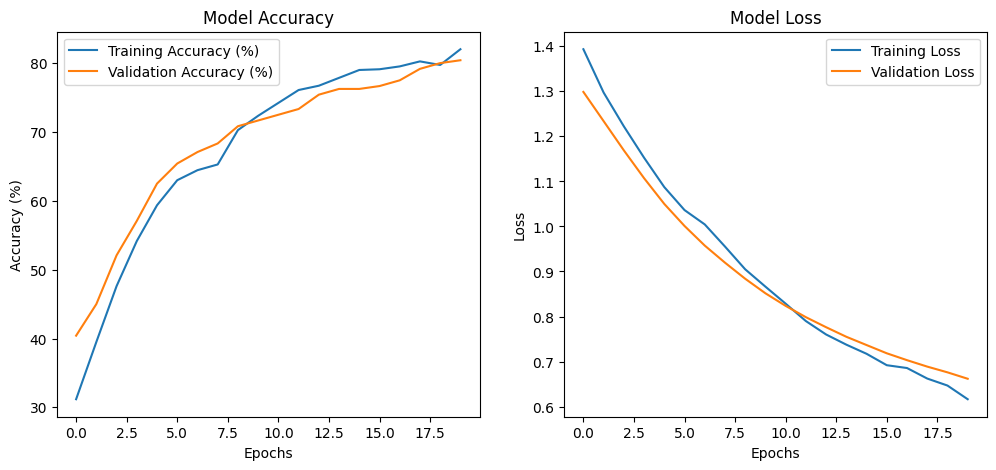

In [106]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 20
NUM_CLASSES = 4
DATA_DIR = r"C:\Users\ambat\OneDrive\Desktop\DATASET-20251203T133241Z-1-001\DATASET"

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(AUTOTUNE)
val_ds = val_ds.prefetch(AUTOTUNE)

# DATA AUGMENTATION
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])


# BASE MODEL

base_model = EfficientNetB0(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

for layer in base_model.layers[:-30]:
    layer.trainable = False

# BUILD MODEL

inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
outputs = Dense(NUM_CLASSES, activation="softmax")(x)

model = Model(inputs, outputs)

# COMPILE
model.compile(
    optimizer=Adam(learning_rate=1e-5),  
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


# TRAIN

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)


# SAVE MODEL

model.save("dermalscan_model.h5")
print("Model saved successfully as dermalscan_model.h5")

# FINAL ACCURACY

train_acc = history.history['accuracy'][-1] * 100
val_acc = history.history['val_accuracy'][-1] * 100

print(f"\nFinal Training Accuracy : {train_acc:.2f} %")
print(f"Final Validation Accuracy : {val_acc:.2f} %")


# PLOT 

train_acc = np.array(history.history['accuracy']) * 100
val_acc = np.array(history.history['val_accuracy']) * 100
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(train_acc, label="Training Accuracy (%)")
plt.plot(val_acc, label="Validation Accuracy (%)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss")
plt.legend()

plt.show()



Found 1202 files belonging to 4 classes.
Using 962 files for training.
Found 1202 files belonging to 4 classes.
Using 240 files for validation.


Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_10        │ (None, 224, 224,  │          0 │ input_layer_11[0… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_5     │ (None, 224, 224,  │          7 │ rescaling_10[0][… │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_11        │ (None, 224, 224,  │          0 │ normalization_5[… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_11[0][… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,378,535 (16.70 MB)

 Trainable params: 2,379,668 (9.08 MB)

 Non-trainable params: 1,998,867 (7.63 MB)

Epoch 1/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 572ms/step - accuracy: 0.3716 - loss: 1.3377

31/31 ━━━━━━━━━━━━━━━━━━━━ 31s 753ms/step - accuracy: 0.4699 - loss: 1.2127 - val_accuracy: 0.6250 - val_loss: 0.9526 - learning_rate: 1.0000e-04
Epoch 2/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 591ms/step - accuracy: 0.7544 - loss: 0.7926

31/31 ━━━━━━━━━━━━━━━━━━━━ 22s 720ms/step - accuracy: 0.7464 - loss: 0.7614 - val_accuracy: 0.7375 - val_loss: 0.6939 - learning_rate: 1.0000e-04
Epoch 3/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 552ms/step - accuracy: 0.7834 - loss: 0.6217

31/31 ━━━━━━━━━━━━━━━━━━━━ 21s 674ms/step - accuracy: 0.8035 - loss: 0.5915 - val_accuracy: 0.8083 - val_loss: 0.5617 - learning_rate: 1.0000e-04
Epoch 4/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 549ms/step - accuracy: 0.8452 - loss: 0.4821

31/31 ━━━━━━━━━━━━━━━━━━━━ 21s 678ms/step - accuracy: 0.8503 - loss: 0.4747 - val_accuracy: 0.8375 - val_loss: 0.4886 - learning_rate: 1.0000e-04
Epoch 5/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 564ms/step - accuracy: 0.8698 - loss: 0.4029

31/31 ━━━━━━━━━━━━━━━━━━━━ 22s 694ms/step - accuracy: 0.8607 - loss: 0.4200 - val_accuracy: 0.8500 - val_loss: 0.4464 - learning_rate: 1.0000e-04
Epoch 6/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 570ms/step - accuracy: 0.8931 - loss: 0.3561

31/31 ━━━━━━━━━━━━━━━━━━━━ 22s 705ms/step - accuracy: 0.8825 - loss: 0.3643 - val_accuracy: 0.8542 - val_loss: 0.4213 - learning_rate: 1.0000e-04
Epoch 7/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 21s 680ms/step - accuracy: 0.8825 - loss: 0.3285 - val_accuracy: 0.8542 - val_loss: 0.3949 - learning_rate: 1.0000e-04
Epoch 8/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 22s 696ms/step - accuracy: 0.9012 - loss: 0.2984 - val_accuracy: 0.8500 - val_loss: 0.3602 - learning_rate: 1.0000e-04
Epoch 9/25
30/31 ━━━━━━━━━━━━━━━━━━━━ 0s 572ms/step - accuracy: 0.9054 - loss: 0.2614

31/31 ━━━━━━━━━━━━━━━━━━━━ 21s 675ms/step - accuracy: 0.9096 - loss: 0.2483 - val_accuracy: 0.8667 - val_loss: 0.3364 - learning_rate: 1.0000e-04
Epoch 10/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 577ms/step - accuracy: 0.9089 - loss: 0.2502

31/31 ━━━━━━━━━━━━━━━━━━━━ 22s 707ms/step - accuracy: 0.9137 - loss: 0.2530 - val_accuracy: 0.8875 - val_loss: 0.3229 - learning_rate: 1.0000e-04
Epoch 11/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 21s 685ms/step - accuracy: 0.9168 - loss: 0.2448 - val_accuracy: 0.8833 - val_loss: 0.3069 - learning_rate: 1.0000e-04
Epoch 12/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 561ms/step - accuracy: 0.9353 - loss: 0.2024

31/31 ━━━━━━━━━━━━━━━━━━━━ 21s 684ms/step - accuracy: 0.9262 - loss: 0.2151 - val_accuracy: 0.8917 - val_loss: 0.3116 - learning_rate: 1.0000e-04
Epoch 13/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 23s 728ms/step - accuracy: 0.9304 - loss: 0.2116 - val_accuracy: 0.8917 - val_loss: 0.2943 - learning_rate: 1.0000e-04
Epoch 14/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 29s 916ms/step - accuracy: 0.9335 - loss: 0.1822 - val_accuracy: 0.8917 - val_loss: 0.2901 - learning_rate: 1.0000e-04
Epoch 15/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 28s 904ms/step - accuracy: 0.9324 - loss: 0.1790 - val_accuracy: 0.8917 - val_loss: 0.2886 - learning_rate: 1.0000e-04
Epoch 16/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 731ms/step - accuracy: 0.9534 - loss: 0.1453

31/31 ━━━━━━━━━━━━━━━━━━━━ 28s 911ms/step - accuracy: 0.9449 - loss: 0.1515 - val_accuracy: 0.8958 - val_loss: 0.2866 - learning_rate: 1.0000e-04
Epoch 17/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 722ms/step - accuracy: 0.9746 - loss: 0.1068

31/31 ━━━━━━━━━━━━━━━━━━━━ 41s 903ms/step - accuracy: 0.9657 - loss: 0.1272 - val_accuracy: 0.9042 - val_loss: 0.2925 - learning_rate: 1.0000e-04
Epoch 18/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 28s 889ms/step - accuracy: 0.9532 - loss: 0.1352 - val_accuracy: 0.8958 - val_loss: 0.2981 - learning_rate: 1.0000e-04
Epoch 19/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 27s 873ms/step - accuracy: 0.9595 - loss: 0.1192 - val_accuracy: 0.9000 - val_loss: 0.2906 - learning_rate: 1.0000e-04
Epoch 20/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 28s 906ms/step - accuracy: 0.9688 - loss: 0.1095 - val_accuracy: 0.8958 - val_loss: 0.2854 - learning_rate: 3.0000e-05
Epoch 21/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 27s 862ms/step - accuracy: 0.9459 - loss: 0.1499 - val_accuracy: 0.8917 - val_loss: 0.2912 - learning_rate: 3.0000e-05
Epoch 22/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 27s 852ms/step - accuracy: 0.9626 - loss: 0.1043 - val_accuracy: 0.8875 - val_loss: 0.3005 - learning_rate: 3.0000e-05


Model saved successfully


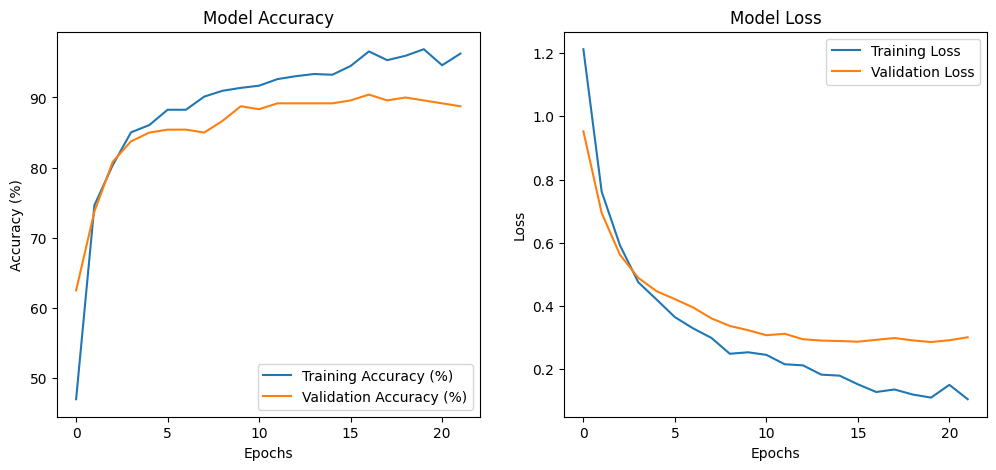

Final Training Accuracy: 96.26%
Final Validation Accuracy: 88.75%


In [104]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 25
NUM_CLASSES = 4
DATASET_DIR = r"C:\Users\ambat\OneDrive\Desktop\DATASET-20251203T133241Z-1-001\DATASET"
SEED = 42

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATASET_DIR,
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATASET_DIR,
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

# DATA AUGMENTATION 

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2),
])

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.map(
    lambda x, y: (preprocess_input(data_augmentation(x)), y)
).prefetch(AUTOTUNE)

val_ds = val_ds.map(
    lambda x, y: (preprocess_input(x), y)
).prefetch(AUTOTUNE)

# MODEL: EfficientNetB0

base_model = EfficientNetB0(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

# Fine-tuning:
base_model.trainable = True
for layer in base_model.layers[:-40]:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
output = Dense(NUM_CLASSES, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)


# COMPILE MODEL

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


# CALLBACKS

callbacks = [
    EarlyStopping(
        monitor="val_accuracy",
        patience=5,
        restore_best_weights=True
    ),
    ReduceLROnPlateau(
        monitor="val_loss",
        patience=3,
        factor=0.3,
        min_lr=1e-6
    ),
    ModelCheckpoint(
        "dermalscan_best_model.h5",
        monitor="val_accuracy",
        save_best_only=True
    )
]

# TRAIN MODEL

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=callbacks
)


model.save("dermalscan_final_model.h5")
print("Model saved successfully")

# PLOT ACCURACY & LOSS
train_acc = np.array(history.history['accuracy']) * 100
val_acc = np.array(history.history['val_accuracy']) * 100
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label="Training Accuracy (%)")
plt.plot(val_acc, label="Validation Accuracy (%)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss")
plt.legend()

plt.show()

print(f"Final Training Accuracy: {train_acc[-1]:.2f}%")
print(f"Final Validation Accuracy: {val_acc[-1]:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


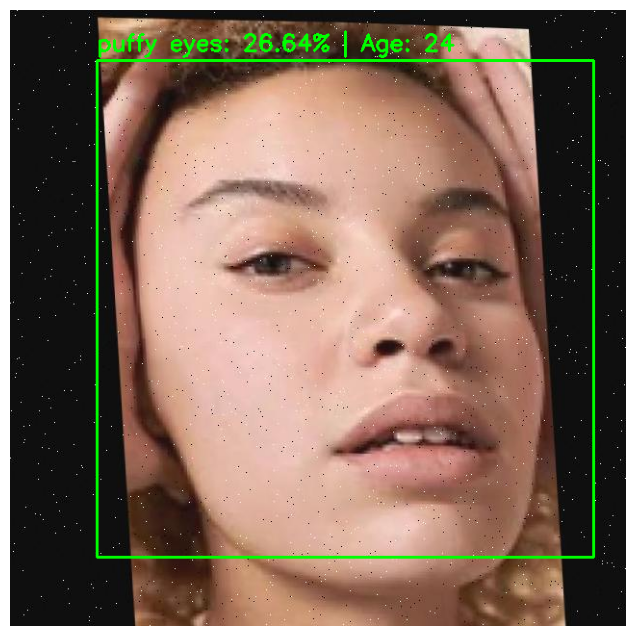

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt

# Load model
skin_model = tf.keras.models.load_model(
    r"C:\Users\ambat\OneDrive\Desktop\dermalscan\.venv\dermalscan_best_model.h5"
)

class_names = ['clear skin', 'dark spots', 'puffy eyes', 'wrinkles']

face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)
assert not face_cascade.empty(), "Haar Cascade not loaded"

# Age estimation function
def estimate_age(label, confidence=None):
    if label == "clear skin":
        return random.randint(18, 28)
    elif label == "puffy eyes":
        return random.randint(22, 32)
    elif label == "dark spots":
        return random.randint(28, 40)
    elif label == "wrinkles":
        return random.randint(40, 60)
    return 25

# Inference function
def run_inference(image_path, model, class_names):
    img = cv2.imread(image_path)
    assert img is not None, "Image not found"

    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    
    faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=1.05,  
        minNeighbors=3,   
        minSize=(30, 30)   
    )

    for (x, y, w, h) in faces:
        face = rgb[y:y+h, x:x+w]
        face_resized = cv2.resize(face, (224, 224)) / 255.0
        face_resized = np.expand_dims(face_resized, axis=0)

        preds = model.predict(face_resized)[0]
        class_index = np.argmax(preds)

        label = class_names[class_index]
        confidence = preds[class_index] * 100
        age = estimate_age(label, confidence)

        text = f"{label}: {confidence:.2f}% | Age: {age}"

        # Draw green box
        cv2.rectangle(rgb, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(
            rgb, text, (x, y-10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.8,
            (0, 255, 0), 2
        )

    return rgb

# Image path
img_path = r"C:\Users\ambat\OneDrive\Desktop\DATASET-20251203T133241Z-1-001\DATASET\clear skin\clear_skin_063.jpg"

output_img = run_inference(img_path, skin_model, class_names)

# Display
plt.figure(figsize=(8,8))
plt.imshow(output_img)
plt.axis("off")
plt.show()